## 의사결정나무 (Decision Tree)

       (1) 장점
            - 만들어진 모델을 쉽게 시각화하여 이해하기 쉽다
            - 데이터의 스케일(scale)에 영향을 받지 않아서 특성(feature)의 정규화나 표준화 같은 전처리 과정이 필요없다

       (2) 단점
            - 사전 가지치기를 사용함에도 과대적합되는 경향이 있어서 일반화 성능이 좋지 않다



<img src='./imgs/DT.png'>


[예제 ] 붓꽃(Iris) 품종 

- 꽃잎(petal)과 꽃받침(sepal)의 폭과 길이를 측정하여 품종을 예측한다
- 150개의 데이타에서 3가지 품종(setosa, versicolor, virginica)로 분류한다

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
# 1. 데이타 로딩

iris = datasets.load_iris()

# 데이터 key 확인
#print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [25]:
# 2. 데이터와 레이블 분리 변수 선언

x = iris['data'] 
y = iris['target']

print(X[:5])
print(y[:5])

# 3. 데이타셋을 분리 ( 학습용:검증용 = 7:3 )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [31]:
# 5. 트리 모델 생성하고 학습하기
#Classifier => 분류
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier( max_depth=3, random_state=0)

# DecisionTreeClassifier 을 통해서 학습시킴 
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [35]:
# 6. 정확도
# metrix 사용가능 

print("훈련데이터 정확도:", model.score(x_train, y_train))
print("테스트데이터 정확도:", model.score(x_test, y_test))


훈련데이터 정확도: 0.9809523809523809
테스트데이터 정확도: 0.9777777777777777





---

# 결정트리 시각화

[ 참고 ] graphviz 설치

    - Graphviz 프로그램 연결하는 라이브러리(??)
        > pip install graphviz
        

    - 직접설치 필요
      :  https://graphviz.gitlab.io/_pages/Download/Download_windows.html
      
      (1) 다운받아 직접 설치
           
           > Windows > Stable 2.38 Windows install packages > 10 > release >  graphviz-2.38.msi 다운로드 받아 실행

      (2) chocolatey를 이용하여 설치
      
          [참고] window10에 초코라때 설치
                1- 먼저 Windows PowerShell (관리자)를 실행합니다.
                2- 한줄로 명령 입력 
> Set-ExecutionPolicy Bypass -Scope Process -Force; iex ((New-Object System.Net.WebClient).DownloadString('https://chocolatey.org/install.ps1'))  

                3- 설치 확인
                    > choco -v
                
                4- choco를 이용하여 설치
                    > choco install graphviz
                    
                5- graphviz 설치 확인
                    C:\Program Files\Graphviz
                    

- 환경변수 지정 (소스에서 ) : C:/Program Files/Graphviz/bin/



        import os

        os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


In [42]:
!pip install graphviz


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# pydotplus 설치
! pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=28961efcb4b690ba9d2ecd7b835421c97fe74a2e8cf217ee73f9e1d42ebc162d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


  DEPRECATION: Building 'pydotplus' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pydotplus'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

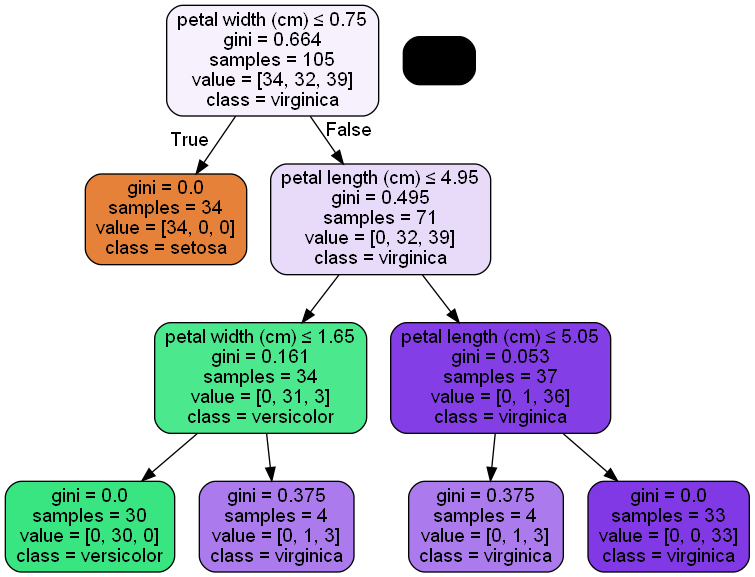

In [46]:
# graphviz의 경로를 환경변수 PATH에 등록
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

dot_data = export_graphviz(model, out_file=None, feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

        #dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
        #                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)


# 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)
# 그래프를 이미지로 변환
Image(graph.create_png())